In [8]:
import os
import glob

# Data handling and manipulation library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_pharm = pd.read_csv('sales_insights_cleaned.csv')

In [10]:
df_pharm.head()

,Account Description,Size,Size Numeric,Strength (mg),WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Year (after 2000),Month,Region_Færøerne,Region_Hovedstaden,Region_Midtjylland,Region_Nordjylland,Region_Sjælland,Region_Syddanmark,Product_Cimzia,Product_Inflectra,Product_Remicade,Product_Remsima,Product_Stelara,Product_Zessly
0,0030 Viborg Svane apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2.0,54149.24,1201.0,12.0,1.0,False,False,True,False,False,False,False,False,False,False,True,False
1,0030 Viborg Svane apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,1.0,27074.62,1204.0,12.0,4.0,False,False,True,False,False,False,False,False,False,False,True,False
2,0030 Viborg Svane apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,1.0,27074.62,1207.0,12.0,7.0,False,False,True,False,False,False,False,False,False,False,True,False
3,0030 Viborg Svane apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2.0,54149.24,1208.0,12.0,8.0,False,False,True,False,False,False,False,False,False,False,True,False
4,0030 Viborg Svane apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,1.0,27074.62,1209.0,12.0,9.0,False,False,True,False,False,False,False,False,False,False,True,False


Sort dataset to rows between 2016 and 2021.
Also sort on Stelara


In [35]:
SortedDf = df_pharm[(df_pharm['Year (after 2000)'] >= 16) & (df_pharm['Year (after 2000)'] <= 20) & (df_pharm['Product_Stelara'] == True)]

SortedDf 

,Account Description,Size,Size Numeric,Strength (mg),WHO ATC 5 Code,Volume,Value,Year Month (after 2000),Year (after 2000),Month,Region_Færøerne,Region_Hovedstaden,Region_Midtjylland,Region_Nordjylland,Region_Sjælland,Region_Syddanmark,Product_Cimzia,Product_Inflectra,Product_Remicade,Product_Remsima,Product_Stelara,Product_Zessly
12,0030 Viborg Svane apotek,1 stk. (0.5 ml),1.0,45.0,L04AC05,1.0,24467.00,1803.0,18.0,3.0,False,False,True,False,False,False,False,False,False,False,True,False
99,0060 aarhus Løve apotek,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,1.0,25737.81,1601.0,16.0,1.0,False,False,True,False,False,False,False,False,False,False,True,False
100,0060 aarhus Løve apotek,1 stk. (0.5 ml),1.0,45.0,L04AC05,2.0,51475.62,1601.0,16.0,1.0,False,False,True,False,False,False,False,False,False,False,True,False
101,0060 aarhus Løve apotek,1 stk. (0.5 ml),1.0,45.0,L04AC05,2.0,51475.62,1602.0,16.0,2.0,False,False,True,False,False,False,False,False,False,False,True,False
102,0060 aarhus Løve apotek,1 stk. (0.5 ml),1.0,45.0,L04AC05,5.0,128689.05,1603.0,16.0,3.0,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,4397 Sønderborg Sygehus. apoteket,1 stk.,1.0,130.0,L04AC05,3.0,75283.08,2002.0,20.0,2.0,False,False,False,False,False,True,False,False,False,False,True,False
7179,4397 Sønderborg Sygehus. apoteket,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2.0,45354.94,2003.0,20.0,3.0,False,False,False,False,False,True,False,False,False,False,True,False
7180,4397 Sønderborg Sygehus. apoteket,1 stk.,1.0,130.0,L04AC05,13.0,326226.68,2003.0,20.0,3.0,False,False,False,False,False,True,False,False,False,False,True,False
7182,4397 Sønderborg Sygehus. apoteket,1 eng. spr. a 1 ml,1.0,90.0,L04AC05,2.0,45354.94,2004.0,20.0,4.0,False,False,False,False,False,True,False,False,False,False,True,False


In [36]:
sum(SortedDf['Value'])

574574224.37

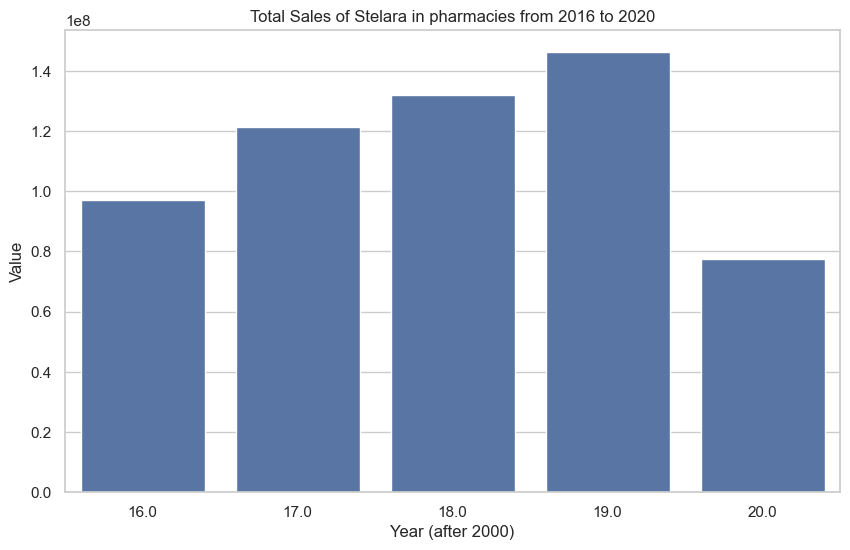

In [41]:
# draw a diagram to show sum(SortedDf['Value']) of Stelara from 2016 to 2020
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Year (after 2000)', y='Value', data=SortedDf, estimator=sum, errorbar=None)
plt.title('Total Sales of Stelara in pharmacies from 2016 to 2020')
plt.show()